In [1]:
!pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.4/632.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 45.7 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [2]:
from comet_ml import Experiment

In [4]:
experiment = Experiment(
    api_key="YOUR_COMET_ML_API_KEY_HERE",
    project_name="keras_heart_disease",
    workspace="galaxy-man",
    auto_metric_logging=True,
    auto_param_logging=True,
    log_graph=True,
    auto_metric_step_rate=True,
    parse_args=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    auto_histogram_epoch_rate=True,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/galaxy-man/keras-heart-disease/edfcc6b83d4c412aa28e977babd7e656



In [5]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

import io
df = pd.read_csv('/content/heart.csv')

In [8]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


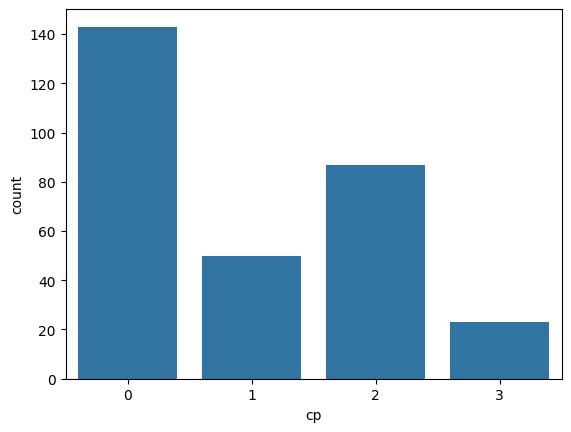

In [10]:
x=(df.cp.value_counts())
print(x)
p = sns.countplot(data=df, x="cp")
plt.show()

In [11]:
df_input = pd.DataFrame(df.iloc[:, 0:13])
df_input.shape

(303, 13)

In [12]:
df_target = pd.DataFrame(df.iloc[:, 13],columns=['output'])
df_target.shape

(303, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_input = scaler.fit_transform(df_input)
df_scaled_input

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [14]:

from sklearn.model_selection import train_test_split
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df_scaled_input, df_target, test_size = 0.30, random_state = 5)
print("Training data Split (Train & Test)")
print(df_input_train.shape)
print(df_input_test.shape)

print("Target data Split (Train & Test)")
print(df_target_train.shape)
print(df_target_test.shape)

Training data Split (Train & Test)
(212, 13)
(91, 13)
Target data Split (Train & Test)
(212, 1)
(91, 1)


In [15]:
## Adding Validation data with Training
X_train, X_val, y_train, y_val = train_test_split(df_input_train, df_target_train, test_size=0.2, random_state=1)
print("Training data Split with  (Train & Test)")
print(X_train.shape)
print(y_train.shape)

print("Validation data Split (Train & Test)")
print(X_val.shape)
print(y_val.shape)


Training data Split with  (Train & Test)
(169, 13)
(169, 1)
Validation data Split (Train & Test)
(43, 13)
(43, 1)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/100
6/6 [==============================] - 2s 59ms/step - loss: 0.8220 - accuracy: 0.3373 - val_loss: 0.6478 - val_accuracy: 0.5581
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 0.7112 - accuracy: 0.4911 - val_loss: 0.5879 - val_accuracy: 0.7674
Epoch 3/100
6/6 [==============================] - 0s 22ms/step - loss: 0.6287 - accuracy: 0.6686 - val_loss: 0.5518 - val_accuracy: 0.8140
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.5701 - accuracy: 0.7041 - val_loss: 0.5286 - val_accuracy: 0.7674
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.5282 - accuracy: 0.7396 - val_loss: 0.5139 - val_accuracy: 0.7907
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 0.4920 - accuracy: 0.7515 - val_loss: 0.5045 - val_accuracy: 0.7674
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.4664 - accuracy: 0.7811 - val_loss: 0.4982 - val_accuracy: 0.7907
Epoch 8/100
6/6 [===

In [19]:
model.summary()
score = model.evaluate(X_train, y_train, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1261 (4.93 KB)
Trainable params: 1261 (4.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Accuracy =  0.9704142212867737


In [20]:
Target_Classification = model.predict(df_input_test)
Target_Classification = (Target_Classification > 0.5)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(df_target_test, Target_Classification))

3/3 [==============================] - 0s 10ms/step
[[38  5]
 [ 9 39]]


In [21]:
import numpy as np
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
print(best_model_accuracy)

0.9644970297813416


In [22]:
model.save('model/keras-heart-disease.bin')

In [23]:
!ls
!ls model/

heart.csv  model  sample_data
keras-heart-disease.bin


In [24]:
from tensorflow import keras
model_x = keras.models.load_model('model/keras-heart-disease.bin')

In [25]:
print(model_x.metrics[0])
print(model_x.metrics[1])


model_x.summary()
score_x = model_x.evaluate(X_train, y_train, verbose=0)
print('Model Accuracy = ',score_x[1])

Mean(name=loss,dtype=float32)
MeanMetricWrapper(name=accuracy,dtype=float32,fn=<function binary_accuracy at 0x7bdbfdaddfc0>)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1261 (4.93 KB)
Trainable params: 1261 (4.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Accuracy =  0.97041422128

In [26]:
!pwd
!ls /content/model
experiment.display()

/content
keras-heart-disease.bin


In [27]:
experiment.log_model("Keras Heart Disease Model", "/content/model/keras-heart-disease.bin")
experiment.log_dataset_hash(X_train)

In [28]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/galaxy-man/keras-heart-disease/edfcc6b83d4c412aa28e977babd7e656
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [100]                : (0.3372780978679657, 0.9644970297813416)
COMET INFO:     batch_accuracy [600]          : (0.28125, 1.0)
COMET INFO:     batch_loss [600]              : (0.038792457431554794, 0.8742773532867432)
COMET INFO:     epoch_duration [100]          : (0.04583291099993403, 1.8173152619999655)
COMET INFO:     loss [100]                    : (0.1229517012834549, 0.8220388889312744)
COMET INFO:     val_accuracy [100]            : (0.5581395626068115, 0.8139534592628479)
COMET INFO:     val